# Carga de datos

In [1]:
library(readr)
library(dplyr)

# Cargar los archivos
df_1_2022 <- read_csv("llamadas_911_2022_s1.csv", show_col_types = FALSE)
df_2_2021 <- read_csv("llamadas_911_2021_s2.csv", show_col_types = FALSE)
df_1_2021 <- read_csv("llamadas_911_2021_s1.csv", show_col_types = FALSE)

# Unir todos en un solo data frame
df <- bind_rows(df_1_2022, df_2_2021, df_1_2021)

# Revisar estructura
glimpse(df)
#df

Warning message:
"package 'readr' was built under R version 4.4.3"
Warning message:
"package 'dplyr' was built under R version 4.4.3"

Adjuntando el paquete: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




Rows: 1,671,036
Columns: 18
$ folio                  <chr> "C5/20220110/02402", "C5/20220129/01383", "C5/2…
$ categoria_incidente_c4 <chr> "Medicos", "Derrame o fuga", "Cadaver", "Cadave…
$ incidente_c4           <chr> "Dolor", "Olor a gas combustible quimicos", "Mu…
$ anio_creacion          <dbl> 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,…
$ mes_creacion           <chr> "Enero", "Enero", "Enero", "Enero", "Enero", "E…
$ fecha_creacion         <date> 2022-01-10, 2022-01-29, 2022-01-29, 2022-01-29…
$ hora_creacion          <time> 17:01:37, 10:39:06, 16:28:36, 15:28:21, 14:33:…
$ anio_cierre            <dbl> 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,…
$ mes_cierre             <chr> "Enero", "Enero", "Enero", "Enero", "Enero", "E…
$ fecha_cierre           <date> 2022-01-10, 2022-01-29, 2022-01-29, 2022-01-29…
$ hora_cierre            <time> 20:04:48, 13:46:10, 21:16:09, 19:26:09, 20:36:…
$ codigo_cierre          <chr> "Otros", "Otros", "A", "A", "A", "A", "A", "A",…
$ clas_con_f

# 1. Agrupa los incidentes por mes y alcaldía, 
# y calcula el número promedio de incidentes por categoría.


Warning message:
"package 'ggplot2' was built under R version 4.4.3"


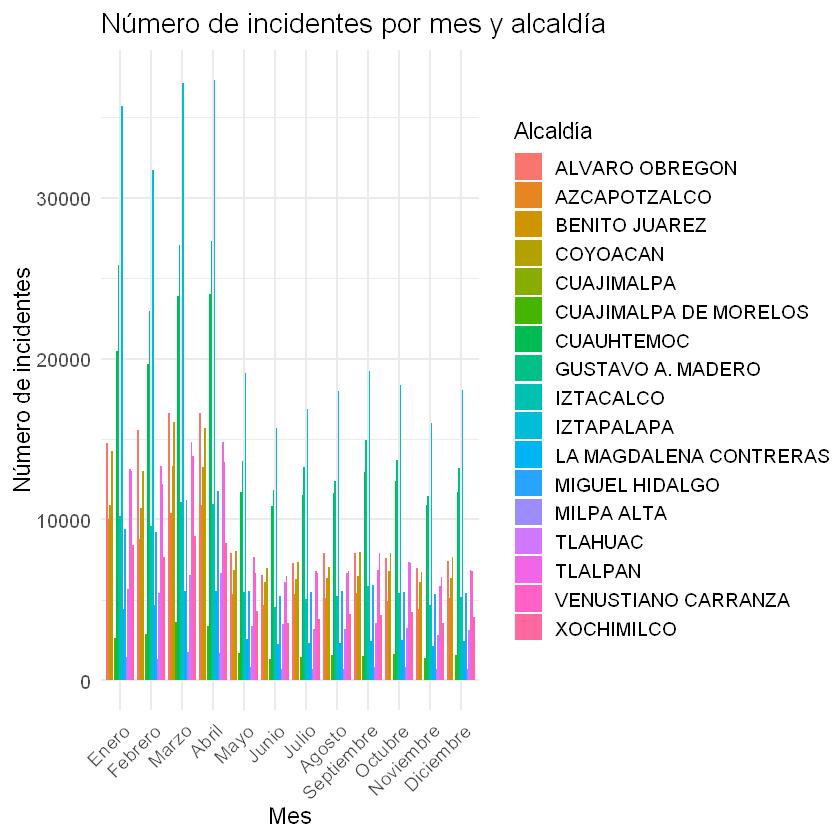

In [2]:
library(dplyr)
library(ggplot2)

# Agrupar por mes y alcaldía
df %>%
  count(mes_creacion, alcaldia_cierre) %>%
  mutate(
    mes_creacion = factor(mes_creacion,
                          levels = c("Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
                                     "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"),
                          ordered = TRUE)
  ) %>%
  ggplot(aes(x = mes_creacion, y = n, fill = alcaldia_cierre)) +
  geom_col(position = "dodge") +
  labs(
    title = "Número de incidentes por mes y alcaldía",
    x = "Mes",
    y = "Número de incidentes",
    fill = "Alcaldía"
  ) +
  theme_minimal(base_size = 14) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [3]:
# extraemos las categorias
library(dplyr)
library(readr)

# Cargar tus datasets
df_1_2022 <- read_csv("llamadas_911_2022_s1.csv", show_col_types = FALSE)
df_2_2021 <- read_csv("llamadas_911_2021_s2.csv", show_col_types = FALSE)
df_1_2021 <- read_csv("llamadas_911_2021_s1.csv", show_col_types = FALSE)

# Unir los tres en un solo dataframe
df <- bind_rows(df_1_2022, df_2_2021, df_1_2021)

# Contar categorías únicas y ordenarlas por frecuencia
categorias <- df %>%
  filter(!is.na(categoria_incidente_c4)) %>%
  count(categoria_incidente_c4, sort = TRUE)

# Ver resultado
print(categorias, n = Inf)


# A tibble: 23 × 2
   categoria_incidente_c4                    n
   <chr>                                 <int>
 1 Disturbio                            291628
 2 Servicios                            271150
 3 Agresion                             172348
 4 Administrativas                      161069
 5 Denuncia                             133330
 6 Medicos                              126229
 7 Lesionado                             72815
 8 Derrame o fuga                        59808
 9 Incendio                              53509
10 Danos por fenomeno natural o tercero  23092
11 Danos                                 15275
12 Abandono                              14983
13 Robo                                  11316
14 Cadaver                                9439
15 Contra la salud                        6383
16 Amenaza                                6353
17 Explosion                              3461
18 Detencion ciudadana                    3422
19 Privacion de la libertad              

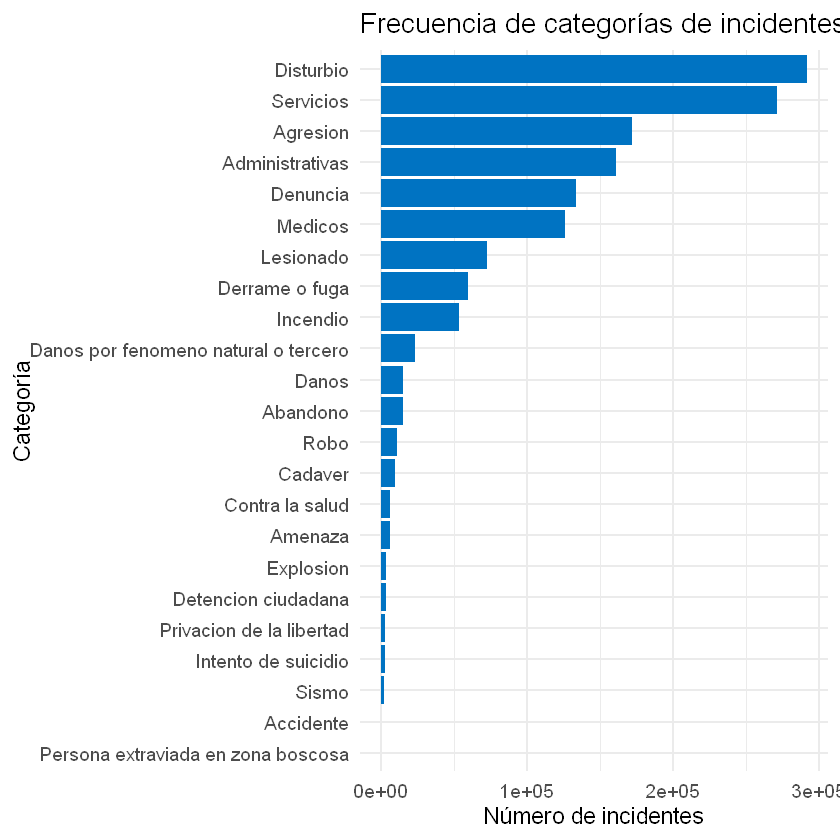

In [4]:
library(dplyr)
library(ggplot2)
library(readr)

# Cargar datasets
df_1_2022 <- read_csv("llamadas_911_2022_s1.csv", show_col_types = FALSE)
df_2_2021 <- read_csv("llamadas_911_2021_s2.csv", show_col_types = FALSE)
df_1_2021 <- read_csv("llamadas_911_2021_s1.csv", show_col_types = FALSE)

# Unir los tres datasets
df <- bind_rows(df_1_2022, df_2_2021, df_1_2021)

# Contar y ordenar categorías
categorias <- df %>%
  filter(!is.na(categoria_incidente_c4)) %>%
  count(categoria_incidente_c4, sort = TRUE)

# Gráfico de barras
ggplot(categorias, aes(x = reorder(categoria_incidente_c4, n), y = n)) +
  geom_col(fill = "#0073C2FF") +
  coord_flip() +
  labs(
    title = "Frecuencia de categorías de incidentes 911",
    x = "Categoría",
    y = "Número de incidentes"
  ) +
  theme_minimal(base_size = 14)


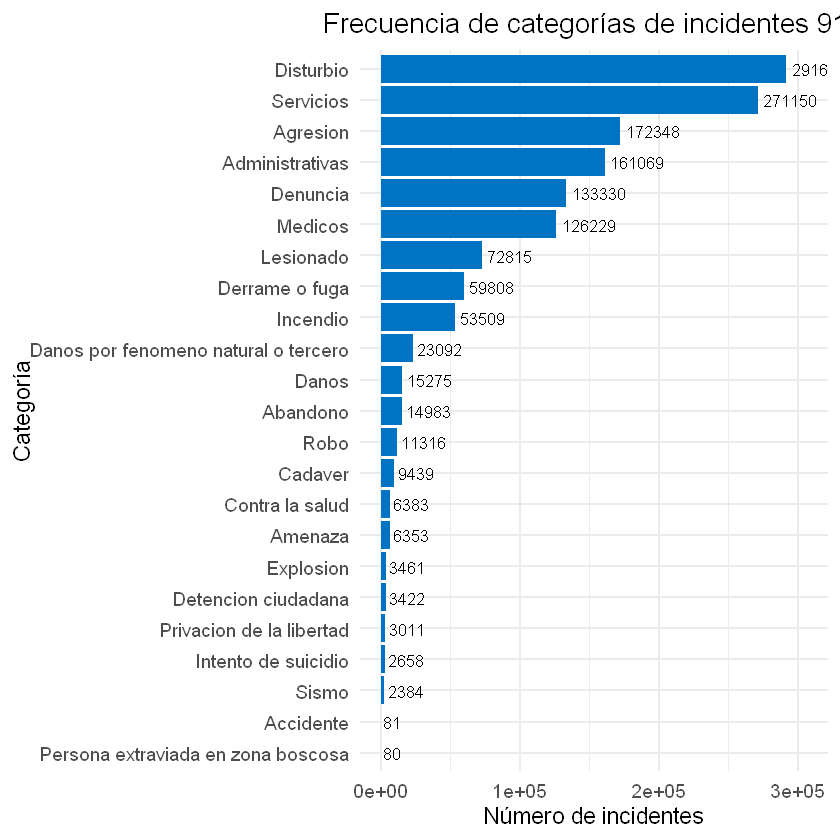

In [5]:
library(dplyr)
library(ggplot2)
library(readr)

# Cargar datasets
df_1_2022 <- read_csv("llamadas_911_2022_s1.csv", show_col_types = FALSE)
df_2_2021 <- read_csv("llamadas_911_2021_s2.csv", show_col_types = FALSE)
df_1_2021 <- read_csv("llamadas_911_2021_s1.csv", show_col_types = FALSE)

# Unir los tres datasets
df <- bind_rows(df_1_2022, df_2_2021, df_1_2021)

# Contar y ordenar categorías
categorias <- df %>%
  filter(!is.na(categoria_incidente_c4)) %>%
  count(categoria_incidente_c4, sort = TRUE)

# Gráfico de barras con etiquetas
ggplot(categorias, aes(x = reorder(categoria_incidente_c4, n), y = n)) +
  geom_col(fill = "#0073C2FF") +
  geom_text(aes(label = n), hjust = -0.1, size = 3.5) +  # Agrega los totales
  coord_flip() +
  labs(
    title = "Frecuencia de categorías de incidentes 911",
    x = "Categoría",
    y = "Número de incidentes"
  ) +
  theme_minimal(base_size = 14) +
  theme(plot.title = element_text(hjust = 0.5)) +
  expand_limits(y = max(categorias$n) * 1.05)  # Espacio para que no se corte el número


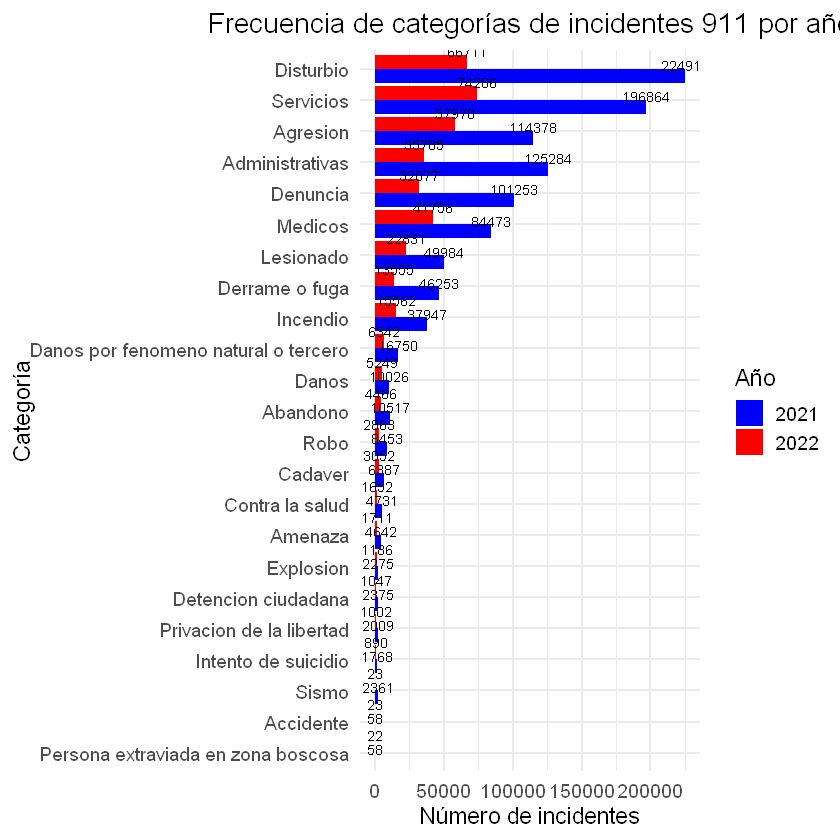

In [6]:
library(dplyr)
library(ggplot2)
library(readr)
# Cargar datasets con columna año
df_1_2022 <- read_csv("llamadas_911_2022_s1.csv", show_col_types = FALSE) %>% mutate(anio = 2022)
df_2_2021 <- read_csv("llamadas_911_2021_s2.csv", show_col_types = FALSE) %>% mutate(anio = 2021)
df_1_2021 <- read_csv("llamadas_911_2021_s1.csv", show_col_types = FALSE) %>% mutate(anio = 2021)
# Unir los datasets
df <- bind_rows(df_1_2022, df_2_2021, df_1_2021)
# Contar categorías por año
categorias_anio <- df %>%
  filter(!is.na(categoria_incidente_c4)) %>%
  count(anio, categoria_incidente_c4)
# Para controlar el orden de las categorías (por total combinado)
orden_categorias <- categorias_anio %>%
  group_by(categoria_incidente_c4) %>%
  summarise(total = sum(n)) %>%
  arrange(total) %>%
  pull(categoria_incidente_c4)
categorias_anio$categoria_incidente_c4 <- factor(categorias_anio$categoria_incidente_c4, levels = orden_categorias)
# Crear gráfico barras agrupadas por año
ggplot(categorias_anio, aes(x = categoria_incidente_c4, y = n, fill = factor(anio))) +
  geom_col(position = "dodge") +
  geom_text(aes(label = n), position = position_dodge(width = 0.9), vjust = -0.5, size = 3) +
  scale_fill_manual(values = c("2020" = "green", "2021" = "blue", "2022" = "red")) +
  coord_flip() +
  labs(
    title = "Frecuencia de categorías de incidentes 911 por año",
    x = "Categoría",
    y = "Número de incidentes",
    fill = "Año"
  ) +
  theme_minimal(base_size = 14) +
  theme(plot.title = element_text(hjust = 0.5))


# 2. Identifica el día de la semana con más incidentes y determinar el total de llamadas para ese día. 


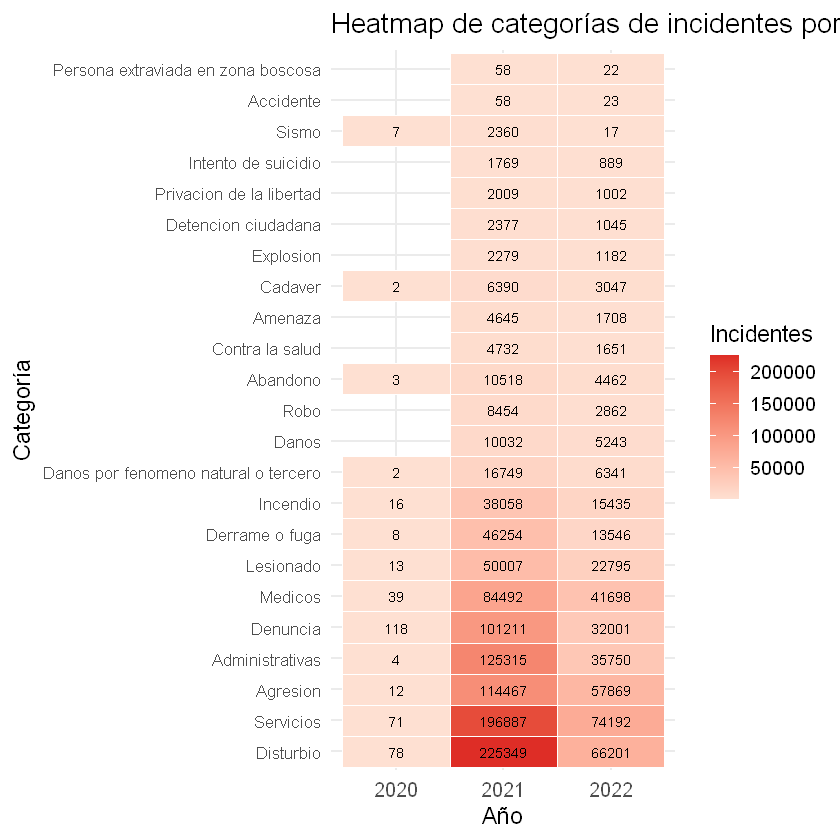

In [7]:
library(dplyr)
library(ggplot2)
library(readr)
# Cargar datasets
df_1_2022 <- read_csv("llamadas_911_2022_s1.csv", show_col_types = FALSE)
df_2_2021 <- read_csv("llamadas_911_2021_s2.csv", show_col_types = FALSE)
df_1_2021 <- read_csv("llamadas_911_2021_s1.csv", show_col_types = FALSE)
# Unir datasets
df <- bind_rows(df_1_2022, df_2_2021, df_1_2021)
# Agrupar por año y categoría, excluir NA
df_heatmap <- df %>%
  filter(!is.na(categoria_incidente_c4), !is.na(anio_creacion)) %>%
  count(anio_creacion, categoria_incidente_c4)
# Gráfico heatmap con números y escala roja
ggplot(df_heatmap, aes(x = factor(anio_creacion), y = reorder(categoria_incidente_c4, -n), fill = n)) +
  geom_tile(color = "white") +
  geom_text(aes(label = n), color = "black", size = 3) +  # Añadir números
  scale_fill_gradient(low = "#fee0d2", high = "#de2d26", name = "Incidentes") +
  labs(
    title = "Heatmap de categorías de incidentes por año",
    x = "Año",
    y = "Categoría"
  ) +
  theme_minimal(base_size = 14) +
  theme(axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 10))


Warning message:
"package 'lubridate' was built under R version 4.4.3"

Adjuntando el paquete: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


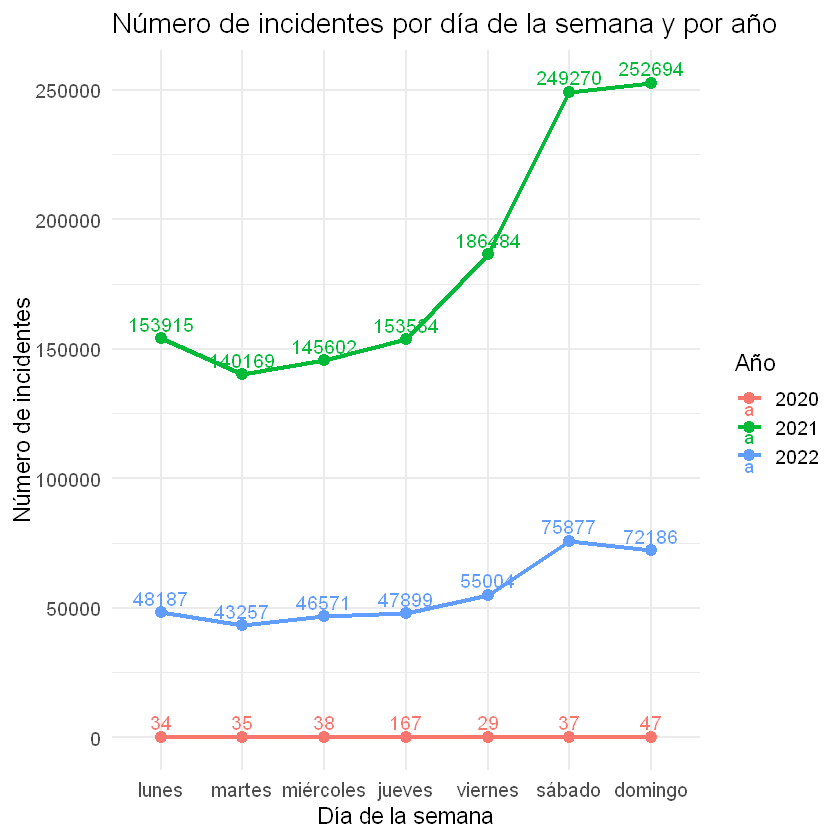

In [8]:
library(dplyr)
library(ggplot2)
library(readr)
library(lubridate)

# Cargar datasets
df_1_2022 <- read_csv("llamadas_911_2022_s1.csv", show_col_types = FALSE)
df_2_2021 <- read_csv("llamadas_911_2021_s2.csv", show_col_types = FALSE)
df_1_2021 <- read_csv("llamadas_911_2021_s1.csv", show_col_types = FALSE)
# Unir datasets
df <- bind_rows(df_1_2022, df_2_2021, df_1_2021)
# Procesar: obtener día de la semana
df_dias <- df %>%
  filter(!is.na(fecha_creacion), !is.na(anio_creacion)) %>%
  mutate(dia_semana = wday(fecha_creacion, label = TRUE, abbr = FALSE, week_start = 1)) %>%  # lunes a domingo
  count(anio_creacion, dia_semana)
# Gráfico de líneas con números
ggplot(df_dias, aes(x = dia_semana, y = n, color = factor(anio_creacion), group = anio_creacion)) +
  geom_line(size = 1.2) +
  geom_point(size = 3) +
  geom_text(aes(label = n), vjust = -0.5, size = 4) +
  labs(
    title = "Número de incidentes por día de la semana y por año",
    x = "Día de la semana",
    y = "Número de incidentes",
    color = "Año"
  ) +
  theme_minimal(base_size = 14) +
  theme(axis.text.x = element_text(size = 12))


# 3. Crea un análisis temporal que muestre la distribución de incidentes por hora del día para las categorías "DELITO", "EMERGENCIA" y "URGENCIA MÉDICA". Utiliza gráficos adecuados para el análisis.

## Todos los años

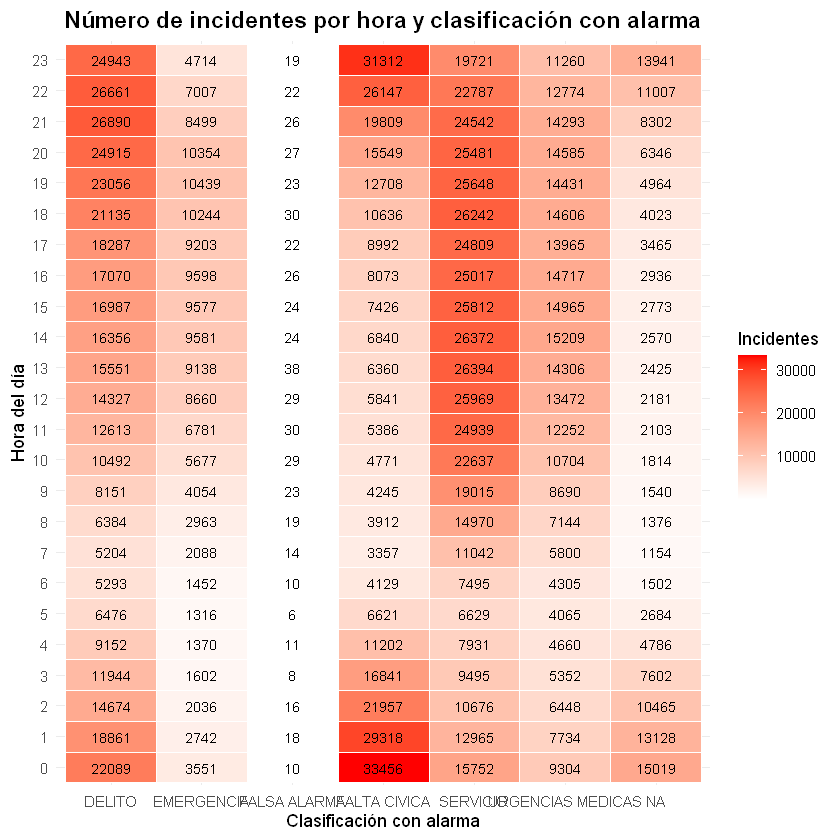

In [9]:
library(readr)
library(dplyr)
library(lubridate)
library(ggplot2)
# Cargar datasets con codificación UTF-8
df_1_2022 <- read_csv("llamadas_911_2022_s1.csv", locale = locale(encoding = "UTF-8"), show_col_types = FALSE)
df_2_2021 <- read_csv("llamadas_911_2021_s2.csv", locale = locale(encoding = "UTF-8"), show_col_types = FALSE)
df_1_2021 <- read_csv("llamadas_911_2021_s1.csv", locale = locale(encoding = "UTF-8"), show_col_types = FALSE)
# Unir datasets
df <- bind_rows(df_1_2022, df_2_2021, df_1_2021)
# Normalizar caracteres especiales
df <- df %>%
  mutate(clas_con_f_alarma = iconv(clas_con_f_alarma, from = "UTF-8", to = "ASCII//TRANSLIT"))
# Verificar columnas necesarias
if (!all(c("hora_creacion", "clas_con_f_alarma") %in% names(df))) {
  stop("Faltan columnas necesarias: 'hora_creacion' y/o 'clas_con_f_alarma'")
}
# Extraer hora
df <- df %>%
  mutate(hora = hour(as.POSIXct(hora_creacion, format = "%H:%M:%S")))
# Agrupar y contar
conteo <- df %>%
  group_by(hora, clas_con_f_alarma) %>%
  summarise(incidentes = n(), .groups = "drop")
# Gráfico de calor
ggplot(conteo, aes(x = clas_con_f_alarma, y = factor(hora), fill = incidentes)) + geom_tile(color = "white") +
  geom_text(aes(label = incidentes), color = "black", size = 3) + scale_fill_gradient(low = "white", high = "red") +
  labs(title = "Número de incidentes por hora y clasificación con alarma", x = "Clasificación con alarma",
    y = "Hora del día", fill = "Incidentes") + theme_minimal() + theme(plot.title = element_text(hjust = 0.5, size = 14, face = "bold"))


# 4. Calcula el tiempo promedio entre la creación y cierre del incidente (usa fecha_creacion y fecha_cierre). Así mismo, determinar el tiempo mínimo y máximo.

In [10]:
library(readr)
library(dplyr)
library(lubridate)
# Unir datasets con su año
df_1_2022 <- read_csv("llamadas_911_2022_s1.csv", locale = locale(encoding = "UTF-8"), show_col_types = FALSE)
df_2_2021 <- read_csv("llamadas_911_2021_s2.csv", locale = locale(encoding = "UTF-8"), show_col_types = FALSE)
df_1_2021 <- read_csv("llamadas_911_2021_s1.csv", locale = locale(encoding = "UTF-8"), show_col_types = FALSE)
df <- bind_rows(df_1_2022, df_2_2021, df_1_2021)
# Limpiar strings y convertir fecha y hora
df <- df %>%
  mutate(
    fecha_creacion = trimws(fecha_creacion),
    hora_creacion = trimws(hora_creacion),
    fecha_cierre = trimws(fecha_cierre),
    hora_cierre = trimws(hora_cierre),
    fecha_hora_creacion = ymd(fecha_creacion) + hms(hora_creacion),
    fecha_hora_cierre = ymd(fecha_cierre) + hms(hora_cierre),
    duracion_minutos = as.numeric(difftime(fecha_hora_cierre, fecha_hora_creacion, units = "mins"))
  )
# Verificar que las fechas están bien convertidas
df %>% select(fecha_creacion, hora_creacion, fecha_hora_creacion) %>% head()
# Calcular estadísticas
resumen <- df %>%
  summarise(
    promedio_min = mean(duracion_minutos, na.rm = TRUE),
    minimo_min = min(duracion_minutos, na.rm = TRUE),
    maximo_min = max(duracion_minutos, na.rm = TRUE)
  )
print(resumen)

fecha_creacion,hora_creacion,fecha_hora_creacion
<chr>,<chr>,<dttm>
2022-01-10,17:01:37,2022-01-10 17:01:37
2022-01-29,10:39:06,2022-01-29 10:39:06
2022-01-29,16:28:36,2022-01-29 16:28:36
2022-01-29,15:28:21,2022-01-29 15:28:21
2022-01-29,14:33:10,2022-01-29 14:33:10
2022-01-29,03:06:52,2022-01-29 03:06:52


# A tibble: 1 × 3
  promedio_min minimo_min maximo_min
         <dbl>      <dbl>      <dbl>
1         166.      -55.9   1086041.


fecha_creacion,hora_creacion,fecha_hora_creacion
<chr>,<chr>,<dttm>
2022-01-10,17:01:37,2022-01-10 17:01:37
2022-01-29,10:39:06,2022-01-29 10:39:06
2022-01-29,16:28:36,2022-01-29 16:28:36
2022-01-29,15:28:21,2022-01-29 15:28:21
2022-01-29,14:33:10,2022-01-29 14:33:10
2022-01-29,03:06:52,2022-01-29 03:06:52


# A tibble: 23 × 3
   categoria_incidente_c4              promedio_duracion_min cantidad_incidentes
   <chr>                                               <dbl>               <int>
 1 Sismo                                               2651.                2384
 2 Denuncia                                             519.              133330
 3 Cadaver                                              335.                9439
 4 Accidente                                            240.                  81
 5 Intento de suicidio                                  224.                2658
 6 Persona extraviada en zona boscosa                   220.                  80
 7 Servicios                                            216.              271150
 8 Derrame o fuga                                       200.               59808
 9 Danos por fenomeno natural o terce…                  194.               23092
10 Abandono                                             175.               14983
# ℹ 13 mo

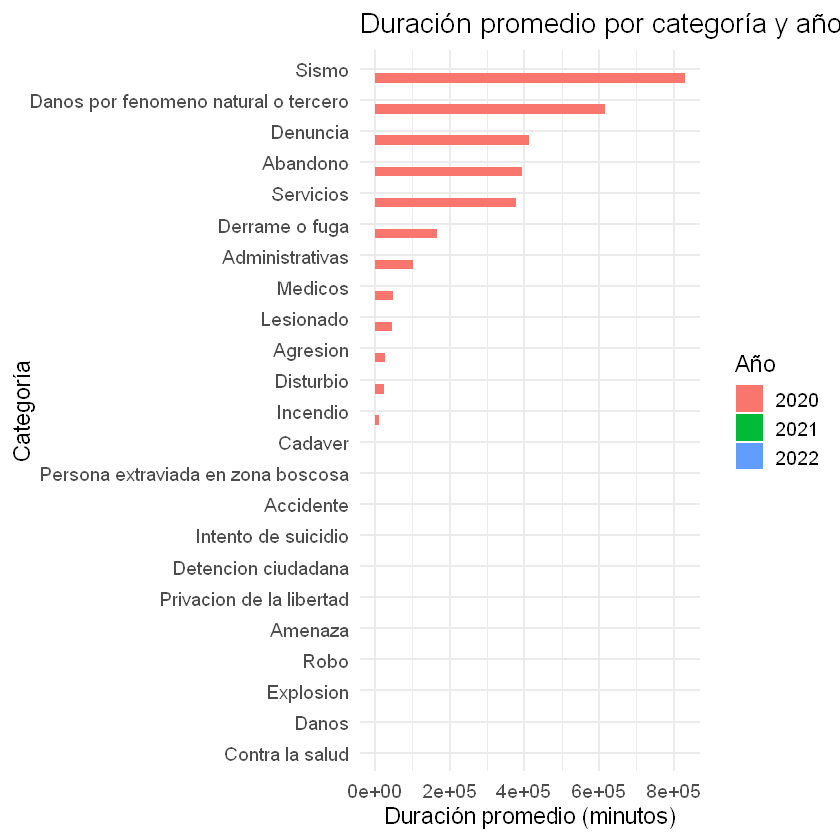

In [11]:
library(readr)
library(dplyr)
library(lubridate)
# Unir datasets con su año
df_1_2022 <- read_csv("llamadas_911_2022_s1.csv", locale = locale(encoding = "UTF-8"), show_col_types = FALSE)
df_2_2021 <- read_csv("llamadas_911_2021_s2.csv", locale = locale(encoding = "UTF-8"), show_col_types = FALSE)
df_1_2021 <- read_csv("llamadas_911_2021_s1.csv", locale = locale(encoding = "UTF-8"), show_col_types = FALSE)
df <- bind_rows(df_1_2022, df_2_2021, df_1_2021)
# Limpiar strings y convertir fecha y hora
df <- df %>%
  mutate(
    fecha_creacion = trimws(fecha_creacion),
    hora_creacion = trimws(hora_creacion),
    fecha_cierre = trimws(fecha_cierre),
    hora_cierre = trimws(hora_cierre),
    fecha_hora_creacion = ymd(fecha_creacion) + hms(hora_creacion),
    fecha_hora_cierre = ymd(fecha_cierre) + hms(hora_cierre),
    duracion_minutos = as.numeric(difftime(fecha_hora_cierre, fecha_hora_creacion, units = "mins"))
  )
# Verificar que las fechas están bien convertidas
df %>%
  select(fecha_creacion, hora_creacion, fecha_hora_creacion) %>%
  head()
# Calcular promedio de duración por categoría
promedio_por_categoria <- df %>%
  filter(!is.na(duracion_minutos), !is.na(categoria_incidente_c4)) %>%
  group_by(categoria_incidente_c4) %>%
  summarise(promedio_duracion_min = mean(duracion_minutos, na.rm = TRUE),cantidad_incidentes = n()) %>%
  arrange(desc(promedio_duracion_min))  # Opcional: ordenar por duración
# Mostrar resultado
print(promedio_por_categoria)
df_por_anio <- df %>%
  filter(!is.na(duracion_minutos), !is.na(categoria_incidente_c4)) %>%
  mutate(anio = year(fecha_hora_creacion)) %>% group_by(anio, categoria_incidente_c4) %>% summarise(promedio_duracion_min = mean(duracion_minutos, na.rm = TRUE),.groups = "drop")
# Gráfico
ggplot(df_por_anio, aes(x = reorder(categoria_incidente_c4, promedio_duracion_min), y = promedio_duracion_min, fill = factor(anio))) +
  geom_col(position = "dodge") +
  coord_flip() +
  labs(
    title = "Duración promedio por categoría y año",
    x = "Categoría",
    y = "Duración promedio (minutos)",
    fill = "Año"
  ) +
  theme_minimal(base_size = 14)

# 5. Determinar el porcentaje de llamadas que fueron clasificadas como "Falsa Alarma".

In [12]:
# Calcular porcentaje de "Falsa Alarma"
porcentaje_falsa_alarma <- df %>%
  filter(!is.na(clas_con_f_alarma)) %>%
  mutate(falsa_alarma = clas_con_f_alarma == "FALSA ALARMA") %>%
  summarise(
    total_llamadas = n(),
    total_falsas = sum(falsa_alarma),
    porcentaje = total_falsas / total_llamadas * 100
  )

print(porcentaje_falsa_alarma)


# A tibble: 1 × 3
  total_llamadas total_falsas porcentaje
           <int>        <int>      <dbl>
1        1671036          504     0.0302


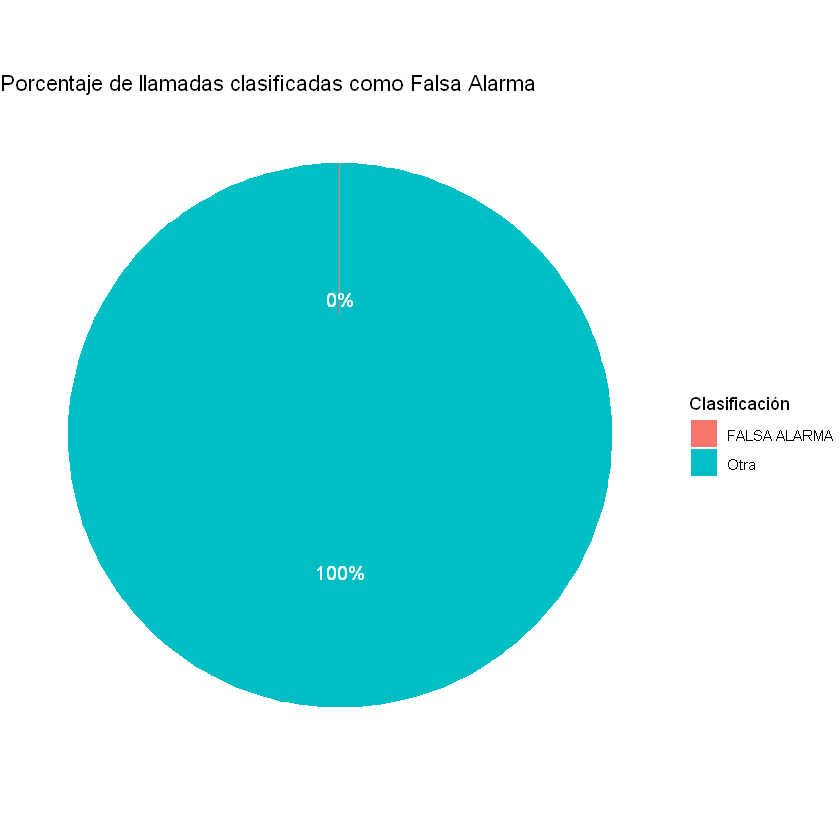

In [13]:
df_falsa <- df %>%
  filter(!is.na(clas_con_f_alarma)) %>%
  mutate(clasificacion = ifelse(clas_con_f_alarma == "FALSA ALARMA", "FALSA ALARMA", "Otra")) %>%
  count(clasificacion) %>%
  mutate(porcentaje = n / sum(n) * 100)

ggplot(df_falsa, aes(x = "", y = porcentaje, fill = clasificacion)) +
  geom_col(width = 1) +
  coord_polar(theta = "y") +
  geom_text(aes(label = paste0(round(porcentaje, 1), "%")), 
            position = position_stack(vjust = 0.5),
            color = "white", size = 4) +
  labs(
    title = "Porcentaje de llamadas clasificadas como Falsa Alarma",
    fill = "Clasificación"
  ) +
  theme_void()


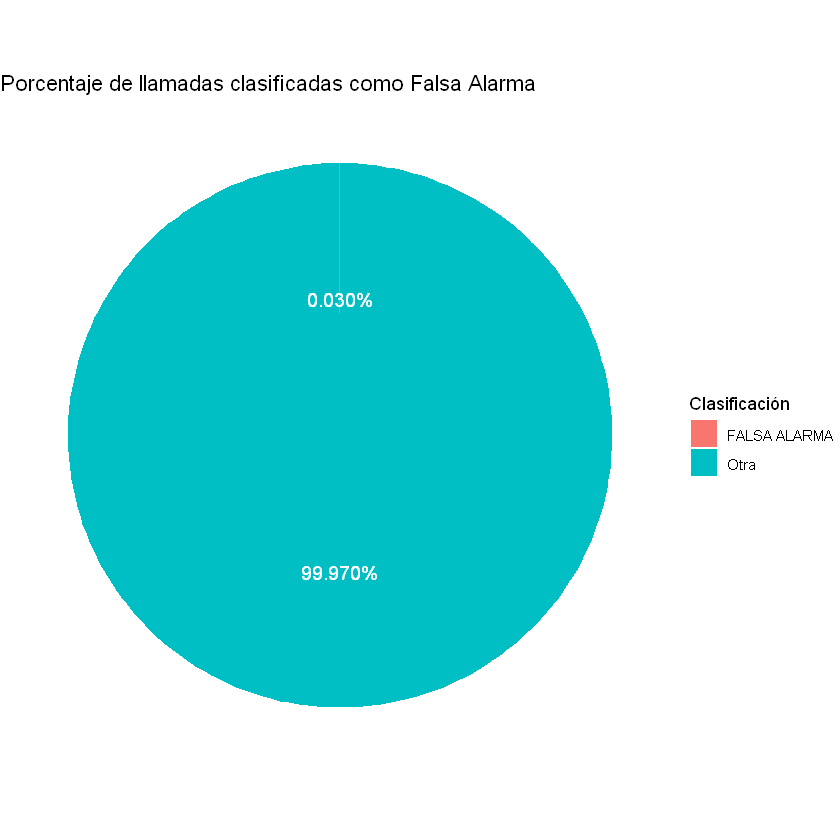

In [14]:
df_falsa <- df %>%
  filter(!is.na(clas_con_f_alarma)) %>%
  mutate(clasificacion = ifelse(clas_con_f_alarma == "FALSA ALARMA", "FALSA ALARMA", "Otra")) %>%
  count(clasificacion) %>%
  mutate(porcentaje = n / sum(n) * 100)

ggplot(df_falsa, aes(x = "", y = porcentaje, fill = clasificacion)) +
  geom_col(width = 1) +
  coord_polar(theta = "y") +
  geom_text(
    aes(label = paste0(sprintf("%.3f", porcentaje), "%")),
    position = position_stack(vjust = 0.5),
    color = "white", size = 4
  ) +
  labs(
    title = "Porcentaje de llamadas clasificadas como Falsa Alarma",
    fill = "Clasificación"
  ) +
  theme_void()


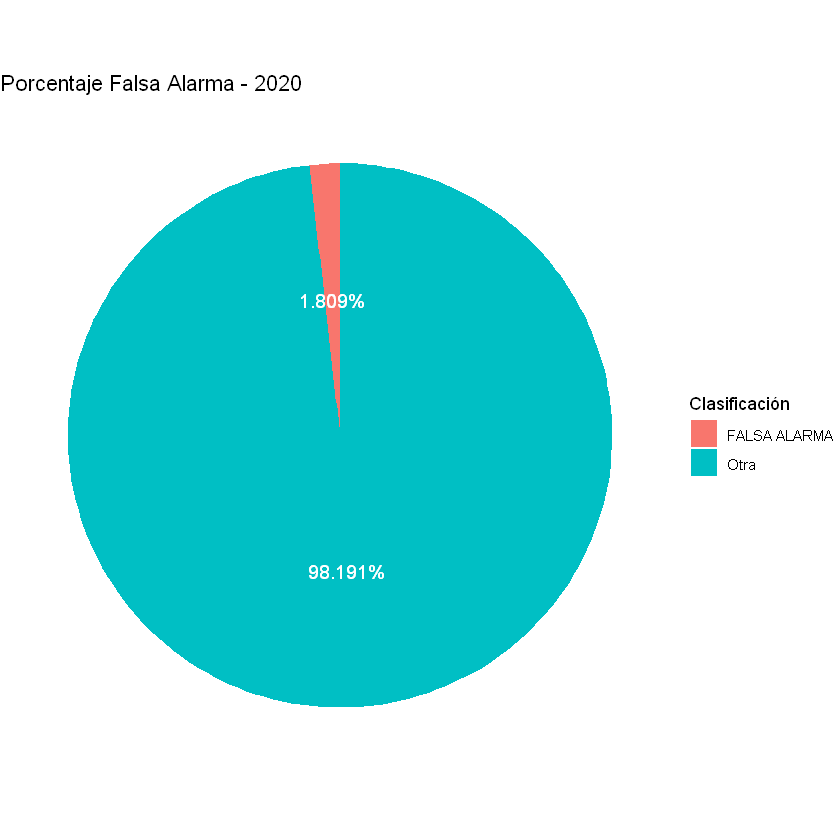

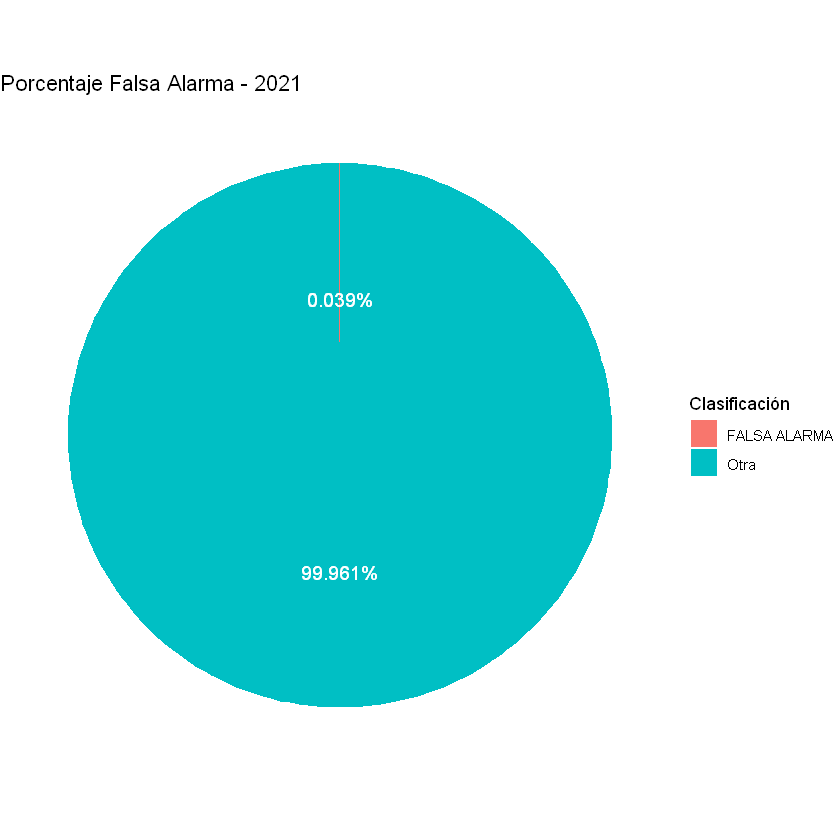

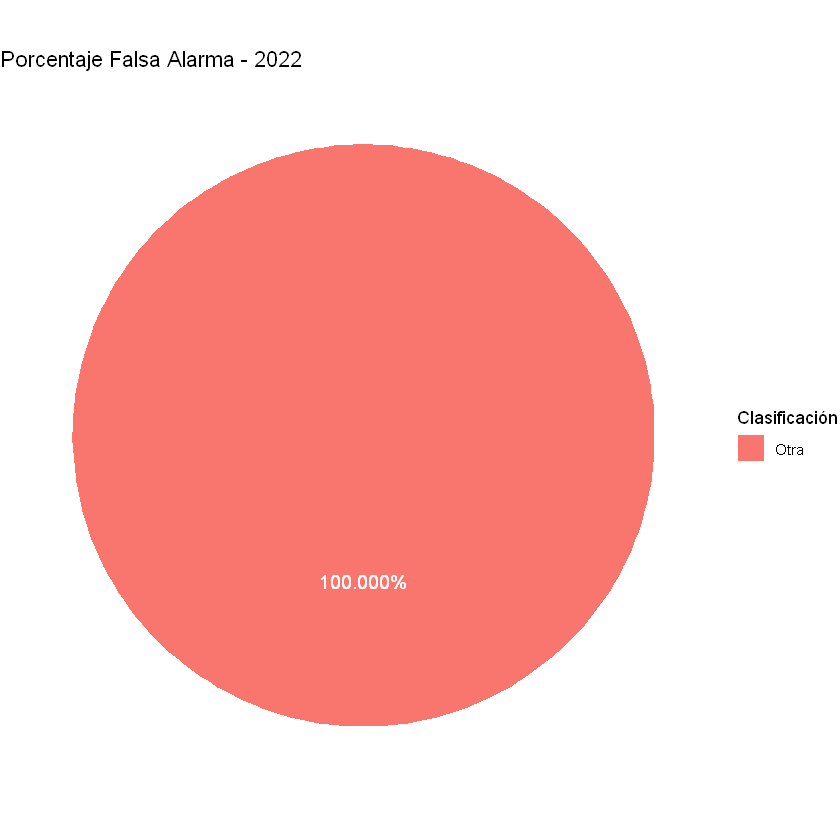

In [15]:
library(ggplot2)
library(dplyr)
library(lubridate)

# Asegurarse de que `fecha_hora_creacion` esté correctamente generado
df <- df %>%
  mutate(
    fecha_hora_creacion = ymd(fecha_creacion) + hms(hora_creacion),
    anio = year(fecha_hora_creacion)
  )

# Función para graficar por año
graficar_falsa_alarma <- function(df, anio_target) {
  df_falsa <- df %>%
    filter(!is.na(clas_con_f_alarma), anio == anio_target) %>%
    mutate(clasificacion = ifelse(clas_con_f_alarma == "FALSA ALARMA", "FALSA ALARMA", "Otra")) %>%
    count(clasificacion) %>%
    mutate(porcentaje = n / sum(n) * 100)

  ggplot(df_falsa, aes(x = "", y = porcentaje, fill = clasificacion)) +
    geom_col(width = 1) +
    coord_polar(theta = "y") +
    geom_text(
      aes(label = paste0(sprintf("%.3f", porcentaje), "%")),
      position = position_stack(vjust = 0.5),
      color = "white", size = 4
    ) +
    labs(
      title = paste("Porcentaje Falsa Alarma -", anio_target),
      fill = "Clasificación"
    ) +
    theme_void()
}

# Graficar por año
grafico_2020 <- graficar_falsa_alarma(df, 2020)
grafico_2021 <- graficar_falsa_alarma(df, 2021)
grafico_2022 <- graficar_falsa_alarma(df, 2022)

# Mostrar gráficos (en RStudio, uno por uno o con patchwork/cowplot/gridExtra)
print(grafico_2020)
print(grafico_2021)
print(grafico_2022)